In [4]:
import os
import csv
import nodens_fns as ndns_fns
from base64 import b64decode as b64decode
import matplotlib.pyplot as plt
from time import sleep as sleep

folder = r"C:\Users\Jose\Queen Mary, University of London\EPSRC-2022 - Documents\Experiments\radar_data"
#folder.replace("\","\\")
file_prefix = 'QMofficeSeries1'
file_date = '202302031518'
file_type = '.csv'

file_0 = os.path.join(folder, file_prefix+file_date+file_type)
file_full = os.path.join(folder, file_prefix+file_date+'_Full'+file_type)

class ExperimentData0:
    def __init__(self):
        self.timestamp = []
        self.sensor_id = []
        self.X = []
        self.Y = []
        self.Z = []
    def update(self,row_data):
        self.timestamp.append(row_data[0])
        self.sensor_id.append(row_data[1])
        self.X.append(row_data[4])
        self.Y.append(row_data[5])
        self.Z.append(row_data[6])

class ExperimentDataFull:
    def __init__(self):
        self.timestamp = []
        self.sensor_id = []
        self.frame_number = []
        self.raw_data = []
    def update(self,row_data):
        self.timestamp.append(row_data[0])
        self.sensor_id.append(row_data[1])
        self.frame_number.append(row_data[2])
        raw_data = b64decode(row_data[3])
        int_data = []
        for i in range(len(raw_data)):
            int_data.append(raw_data[i])
        self.raw_data.append(int_data)
        

#data = []
data_0 = ExperimentData0()
with open(file_0, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        data_0.update(row)

data_full = ExperimentDataFull()
with open(file_full, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        data_full.update(row)

[]


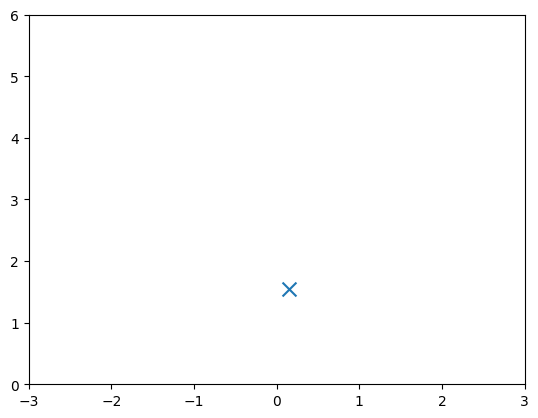

In [6]:
from IPython.display import display, clear_output

#%matplotlib notebook
fig, ax1 = plt.subplots()


scatter1 = ax1.plot([], [])

num_frames = len(data_full.raw_data)
sd = ndns_fns.parseTLV(3)
for i in range(num_frames):
    sd.update(3, data_full.raw_data[i], 5)
    ax1.cla()
    ax1.scatter(sd.pc.X, sd.pc.Y, s=10, c='#FF0000')
    ax1.scatter(sd.track.X, sd.track.Y, s=100, marker='x')
    ax1.set_ylim(0, 6)
    ax1.set_xlim(-3, 3)
    
    #fig.canvas.draw()
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.1)
    

In [7]:
vars(ax1)

{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <AxesSubplot: >,
 'figure': <Figure size 640x480 with 1 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x206c9afb640>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 640x480 with 1 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]]),
 '_originalPosition': Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]]),
 '_aspect': 'auto',
 '_adjustable': 'box',
 '_anchor': 'C',
 '_stale_viewlims': {'x': False, 'y': False},
 '_sharex': None,
